In [1]:
import pandas as pd
import seaborn as sns
import qmplot
import pylab
import numpy as np

In [2]:
with open('inputs/accession.txt', 'r') as reader:
    mapp = reader.readlines()
reader.close()
mapp = [i[:-1] for i in mapp[:-1]]
print(mapp)

['SRR11458319', 'SRR11458320', 'SRR11458321', 'SRR11458322', 'SRR11458323', 'SRR11458324', 'SRR11458325', 'SRR11458326', 'SRR11458327', 'SRR11458328', 'SRR11458329', 'SRR11458330']


In [3]:
data = []
for i in mapp:
    data.append(pd.read_csv("inputs/" + i + ".vcf", sep="\t", skiprows=111395))

In [5]:
data[0].head()

#CHROM     POS ID REF ALT  QUAL FILTER  \
0  CM017872.1  274195  .   C   G    56      .   
1  CM017872.1  278871  .   T   C    93      .   
2  CM017872.1  278974  .   A   G    57      .   
3  CM017872.1  279388  .   C   T    61      .   
4  CM017872.1  279397  .   T   C    51      .   

                                                INFO FORMAT  \
0  DP=27;VDB=0.0988809;SGB=-0.676189;RPB=0.321568...  GT:PL   
1  DP=39;VDB=0.896172;SGB=-0.69168;RPB=0.677463;M...  GT:PL   
2  DP=30;VDB=0.937076;SGB=-0.680642;RPB=0.925098;...  GT:PL   
3  DP=37;VDB=0.774083;SGB=-0.688148;RPB=0.995012;...  GT:PL   
4  DP=33;VDB=0.5086;SGB=-0.680642;RPB=0.817411;MQ...  GT:PL   

  ./inputs/SRR11458319/STAR_ini/Aligned.sortedByCoord.out.bam  
0                                       0/1:89,0,112           
1                                       0/1:126,0,97           
2                                       0/1:90,0,108           
3                                       0/1:94,0,135           
4                                       0/1:84,0,125

In [6]:
corr = {"CM017872.1":"1", "CM017873.1":"2", "CM017874.1":"3", "CM017875.1":"4", "CM017876.1":"5", "CM017877.1":"6", "CM017878.1":"7", "CM017879.1":"8", "CM017880.1":"9", "CM017881.1":"10", "CM017882.1":"11", "CM017883.1":"12", "CM017884.1":"13", "CM017885.1":"14", "CM017886.1":"15", "CM017887.1":"16"}
for i in range(len(data)): data[i] = data[i].replace({"#CHROM": corr})
data[0].head()

#CHROM     POS ID REF ALT  QUAL FILTER  \
0      1  274195  .   C   G    56      .   
1      1  278871  .   T   C    93      .   
2      1  278974  .   A   G    57      .   
3      1  279388  .   C   T    61      .   
4      1  279397  .   T   C    51      .   

                                                INFO FORMAT  \
0  DP=27;VDB=0.0988809;SGB=-0.676189;RPB=0.321568...  GT:PL   
1  DP=39;VDB=0.896172;SGB=-0.69168;RPB=0.677463;M...  GT:PL   
2  DP=30;VDB=0.937076;SGB=-0.680642;RPB=0.925098;...  GT:PL   
3  DP=37;VDB=0.774083;SGB=-0.688148;RPB=0.995012;...  GT:PL   
4  DP=33;VDB=0.5086;SGB=-0.680642;RPB=0.817411;MQ...  GT:PL   

  ./inputs/SRR11458319/STAR_ini/Aligned.sortedByCoord.out.bam  
0                                       0/1:89,0,112           
1                                       0/1:126,0,97           
2                                       0/1:90,0,108           
3                                       0/1:94,0,135           
4                                       0/1:84,0,125

In [7]:
df = []
for i in range(len(data)):
    df.append(data[i].loc[data[i]["#CHROM"].isin(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])].copy())
    print(df[-1].shape)
print(df[0].head())

(16070, 10)
(13060, 10)
(16612, 10)
(7635, 10)
(10616, 10)
(15281, 10)
(8524, 10)
(9765, 10)
(10791, 10)
(10652, 10)
(18638, 10)
(13978, 10)
  #CHROM     POS ID REF ALT  QUAL FILTER  \
0      1  274195  .   C   G    56      .   
1      1  278871  .   T   C    93      .   
2      1  278974  .   A   G    57      .   
3      1  279388  .   C   T    61      .   
4      1  279397  .   T   C    51      .   

                                                INFO FORMAT  \
0  DP=27;VDB=0.0988809;SGB=-0.676189;RPB=0.321568...  GT:PL   
1  DP=39;VDB=0.896172;SGB=-0.69168;RPB=0.677463;M...  GT:PL   
2  DP=30;VDB=0.937076;SGB=-0.680642;RPB=0.925098;...  GT:PL   
3  DP=37;VDB=0.774083;SGB=-0.688148;RPB=0.995012;...  GT:PL   
4  DP=33;VDB=0.5086;SGB=-0.680642;RPB=0.817411;MQ...  GT:PL   

  ./inputs/SRR11458319/STAR_ini/Aligned.sortedByCoord.out.bam  
0                                       0/1:89,0,112           
1                                       0/1:126,0,97           
2                      

In [8]:
pylab.rcParams['figure.figsize'] = (7, 4.5)
pylab.rcParams["figure.dpi"] = 600

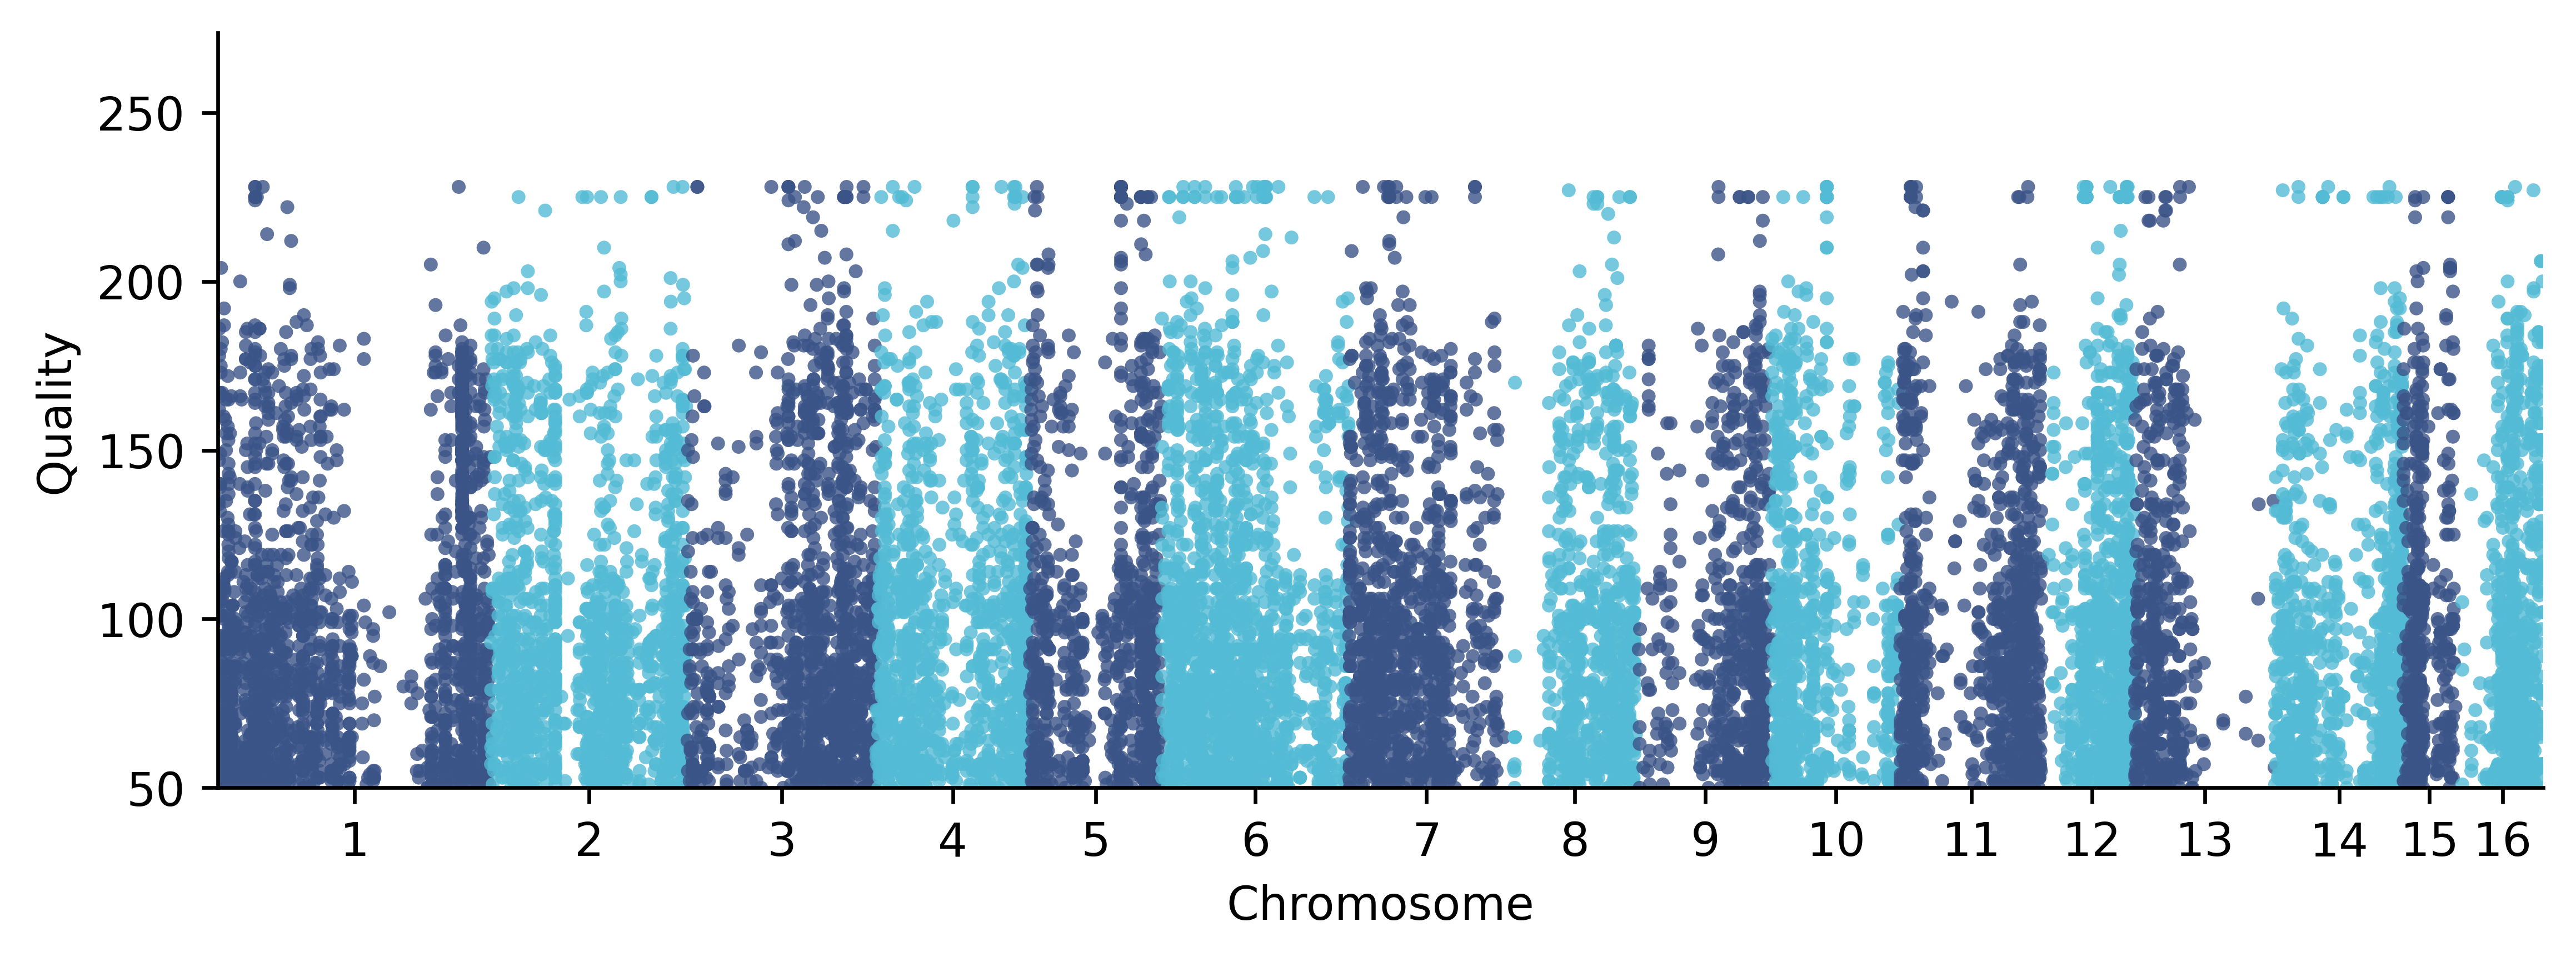

In [9]:
ax = qmplot.manhattanplot(data=df[0], pv="QUAL", logp=False, ylabel="Quality")

In [10]:
exp = ["f-cont", "f-cont", "f-res", "r-cont", "r-cont", "f-res", "r-cont", "r-res", "r-res", "r-res", "f-cont", "f-res"]

In [11]:
[(x[0], x[1]) for x in df[3].values if int(x[1]) in df[1]["POS"]]

[('10', 2124),
 ('10', 2810),
 ('10', 2866),
 ('10', 2962),
 ('10', 2964),
 ('10', 3143),
 ('10', 3168)]

In [12]:
alldf = df[0].copy()
alldf["Count"] = [1 for i in range(alldf.shape[0])]
print(alldf.shape)
for i in range(1, 12):
    print(df[i].shape)
    for j in df[i].values:
        x = alldf.loc[(alldf['#CHROM']==j[0]) & (alldf['POS']==j[1])]
        if len(x)<1:
            j = np.append(j, [1])
            alldf = alldf.append(dict(zip(alldf.columns, j)), ignore_index=True)
        else:
            alldf.loc[(alldf['#CHROM']==j[0]) & (alldf['POS']==j[1]), "Count"] = alldf.loc[(alldf['#CHROM']==j[0]) & (alldf['POS']==j[1]), "Count"] + 1
            alldf.loc[(alldf['#CHROM']==j[0]) & (alldf['POS']==j[1]), "QUAL"] = min(int(alldf.loc[(alldf['#CHROM']==j[0]) & (alldf['POS']==j[1]), "QUAL"]), int(j[5]))
    print("Resultado parcial: ",  alldf.shape)
    print(alldf.Count.unique())

(16070, 11)
(13060, 10)
Resultado parcial:  (21081, 11)
[1 2]
(16612, 10)
Resultado parcial:  (25548, 11)
[1 3 2]
(7635, 10)
Resultado parcial:  (26738, 11)
[1 3 2 4]
(10616, 10)
Resultado parcial:  (27978, 11)
[1 4 2 5 3]
(15281, 10)
Resultado parcial:  (30619, 11)
[1 4 2 5 6 3]
(8524, 10)
Resultado parcial:  (31056, 11)
[1 5 2 6 7 4 3]
(9765, 10)
Resultado parcial:  (31669, 11)
[1 6 2 7 8 4 5 3]
(10791, 10)
Resultado parcial:  (32745, 11)
[1 2 7 8 9 5 6 4 3]
(10652, 10)
Resultado parcial:  (33477, 11)
[ 1  2  8 10  6  7  3  4  9  5]
(18638, 10)
Resultado parcial:  (37199, 11)
[ 1  2  9 11  7  8  4 10  6  5  3]
(13978, 10)
Resultado parcial:  (37901, 11)
[ 1  2 10 12  7  8  4 11  9  6  5  3]


IndexError: list index out of range

In [40]:
pylab.rcParams['figure.figsize'] = (5, 1.5)
pylab.rcParams["figure.dpi"] = 600

/home/ana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Número de amostras contendo a variante')

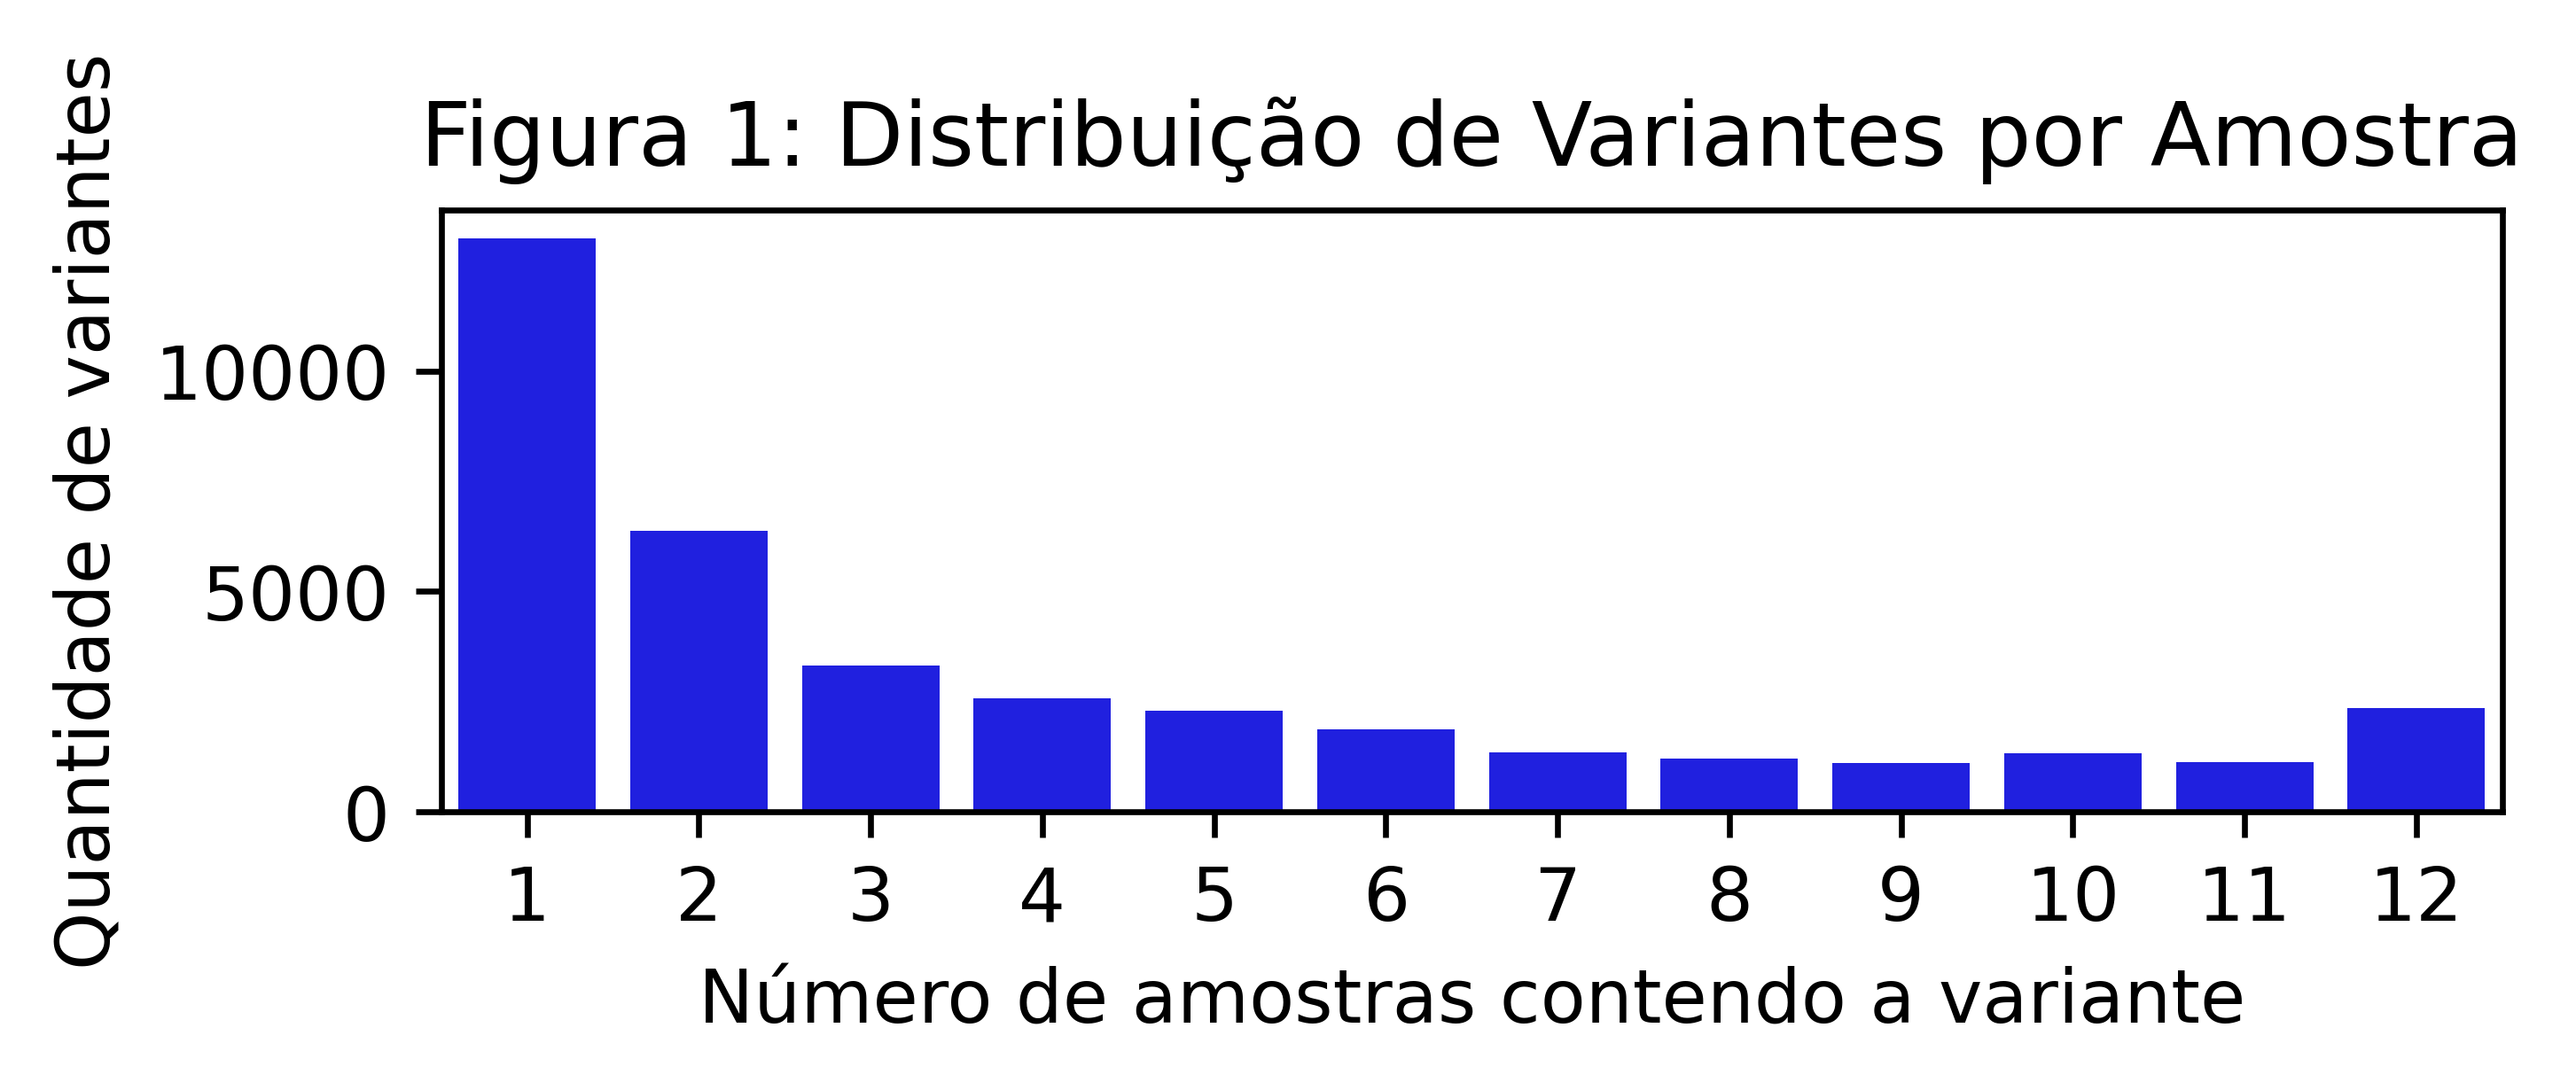

In [46]:
ax = sns.countplot(alldf.Count, color="blue")
ax.set_title("Figura 1: Distribuição de Variantes por Amostra")
ax.set_ylabel("Quantidade de variantes")
ax.set_xlabel("Número de amostras contendo a variante")

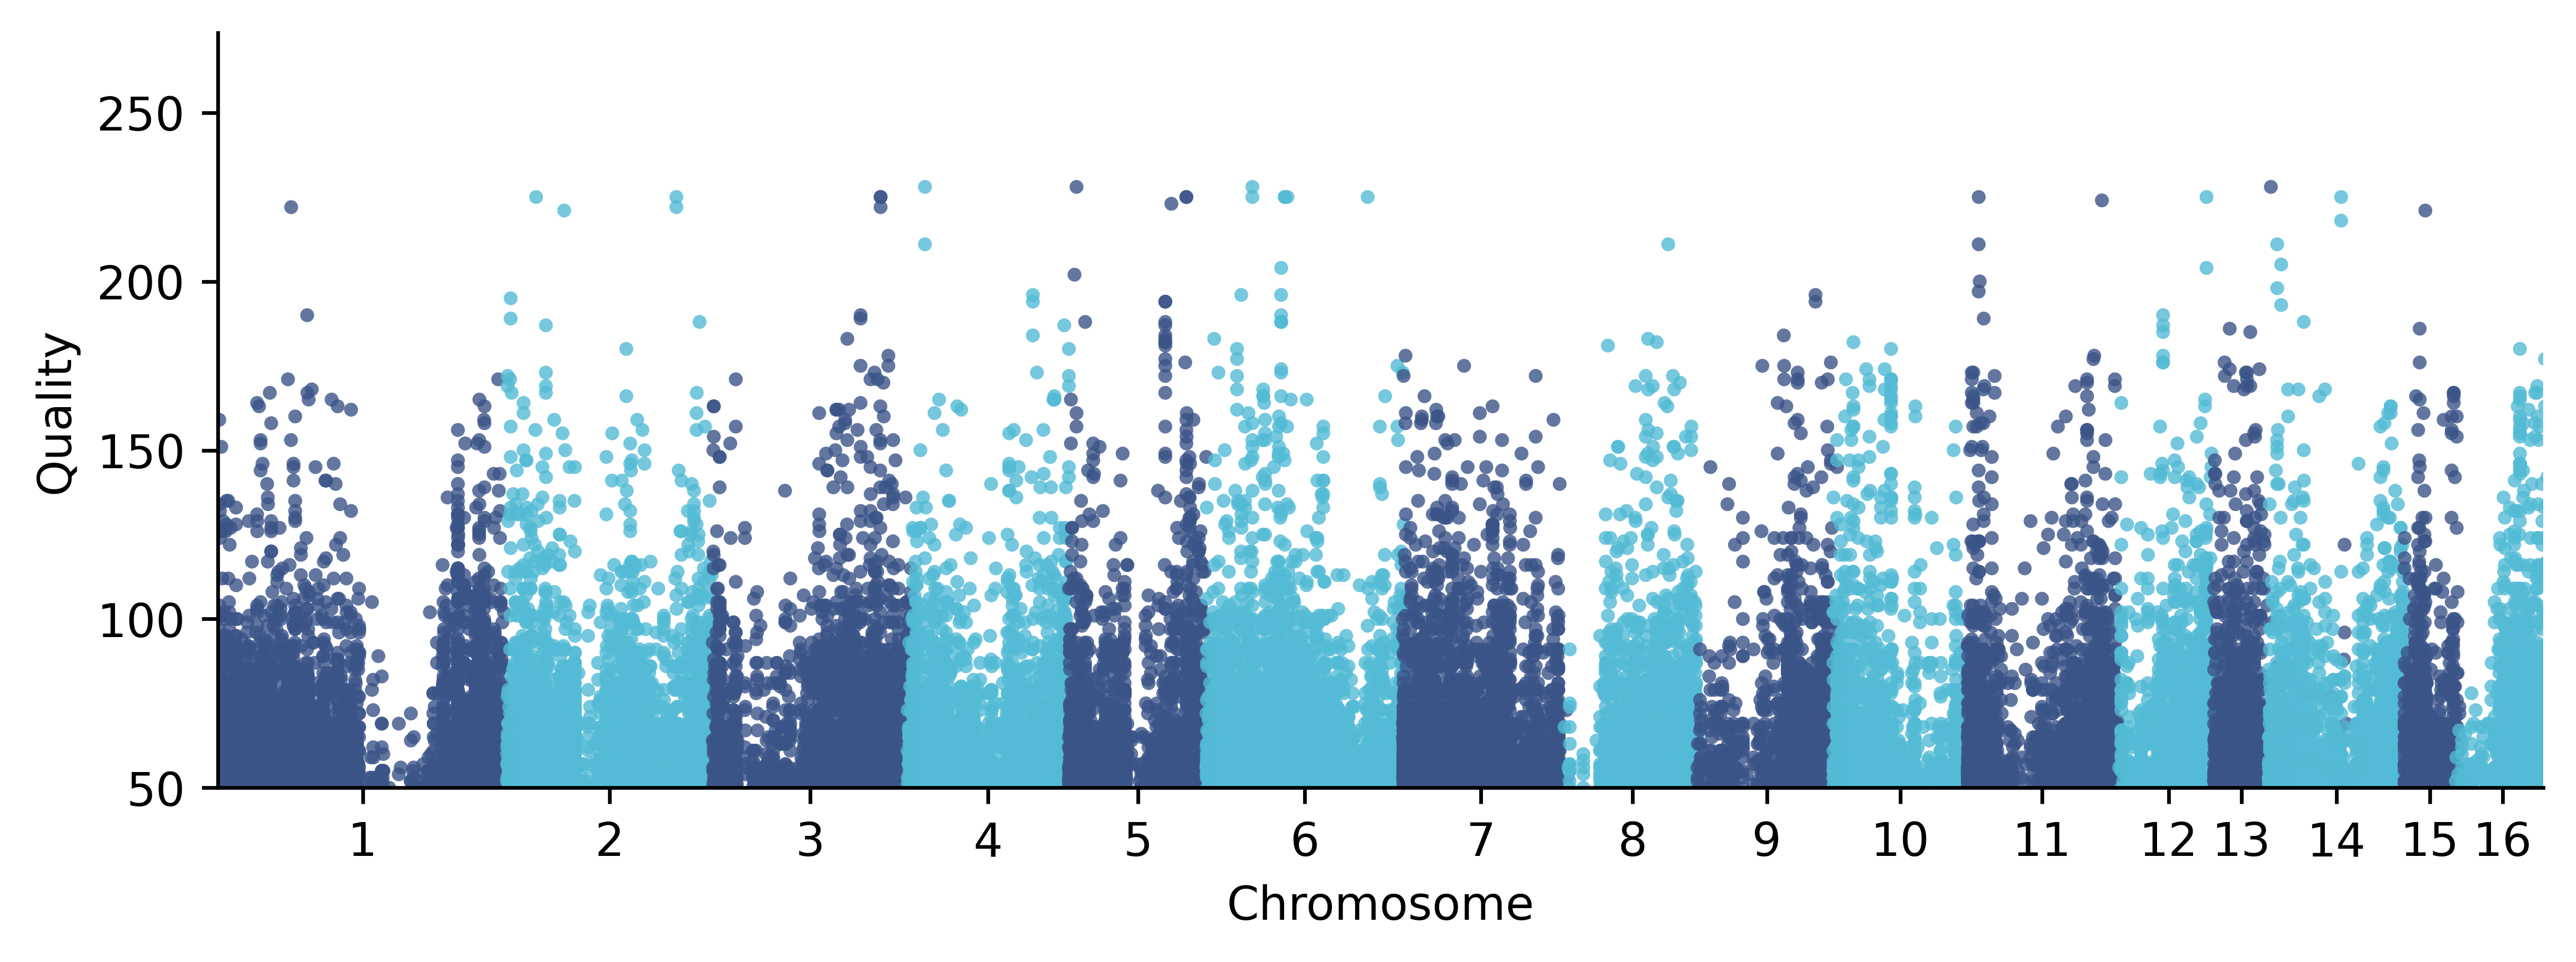

In [42]:
ax = qmplot.manhattanplot(data=alldf, pv="QUAL", logp=False, ylabel="Quality", )

(37901, 11)
(22554, 11)


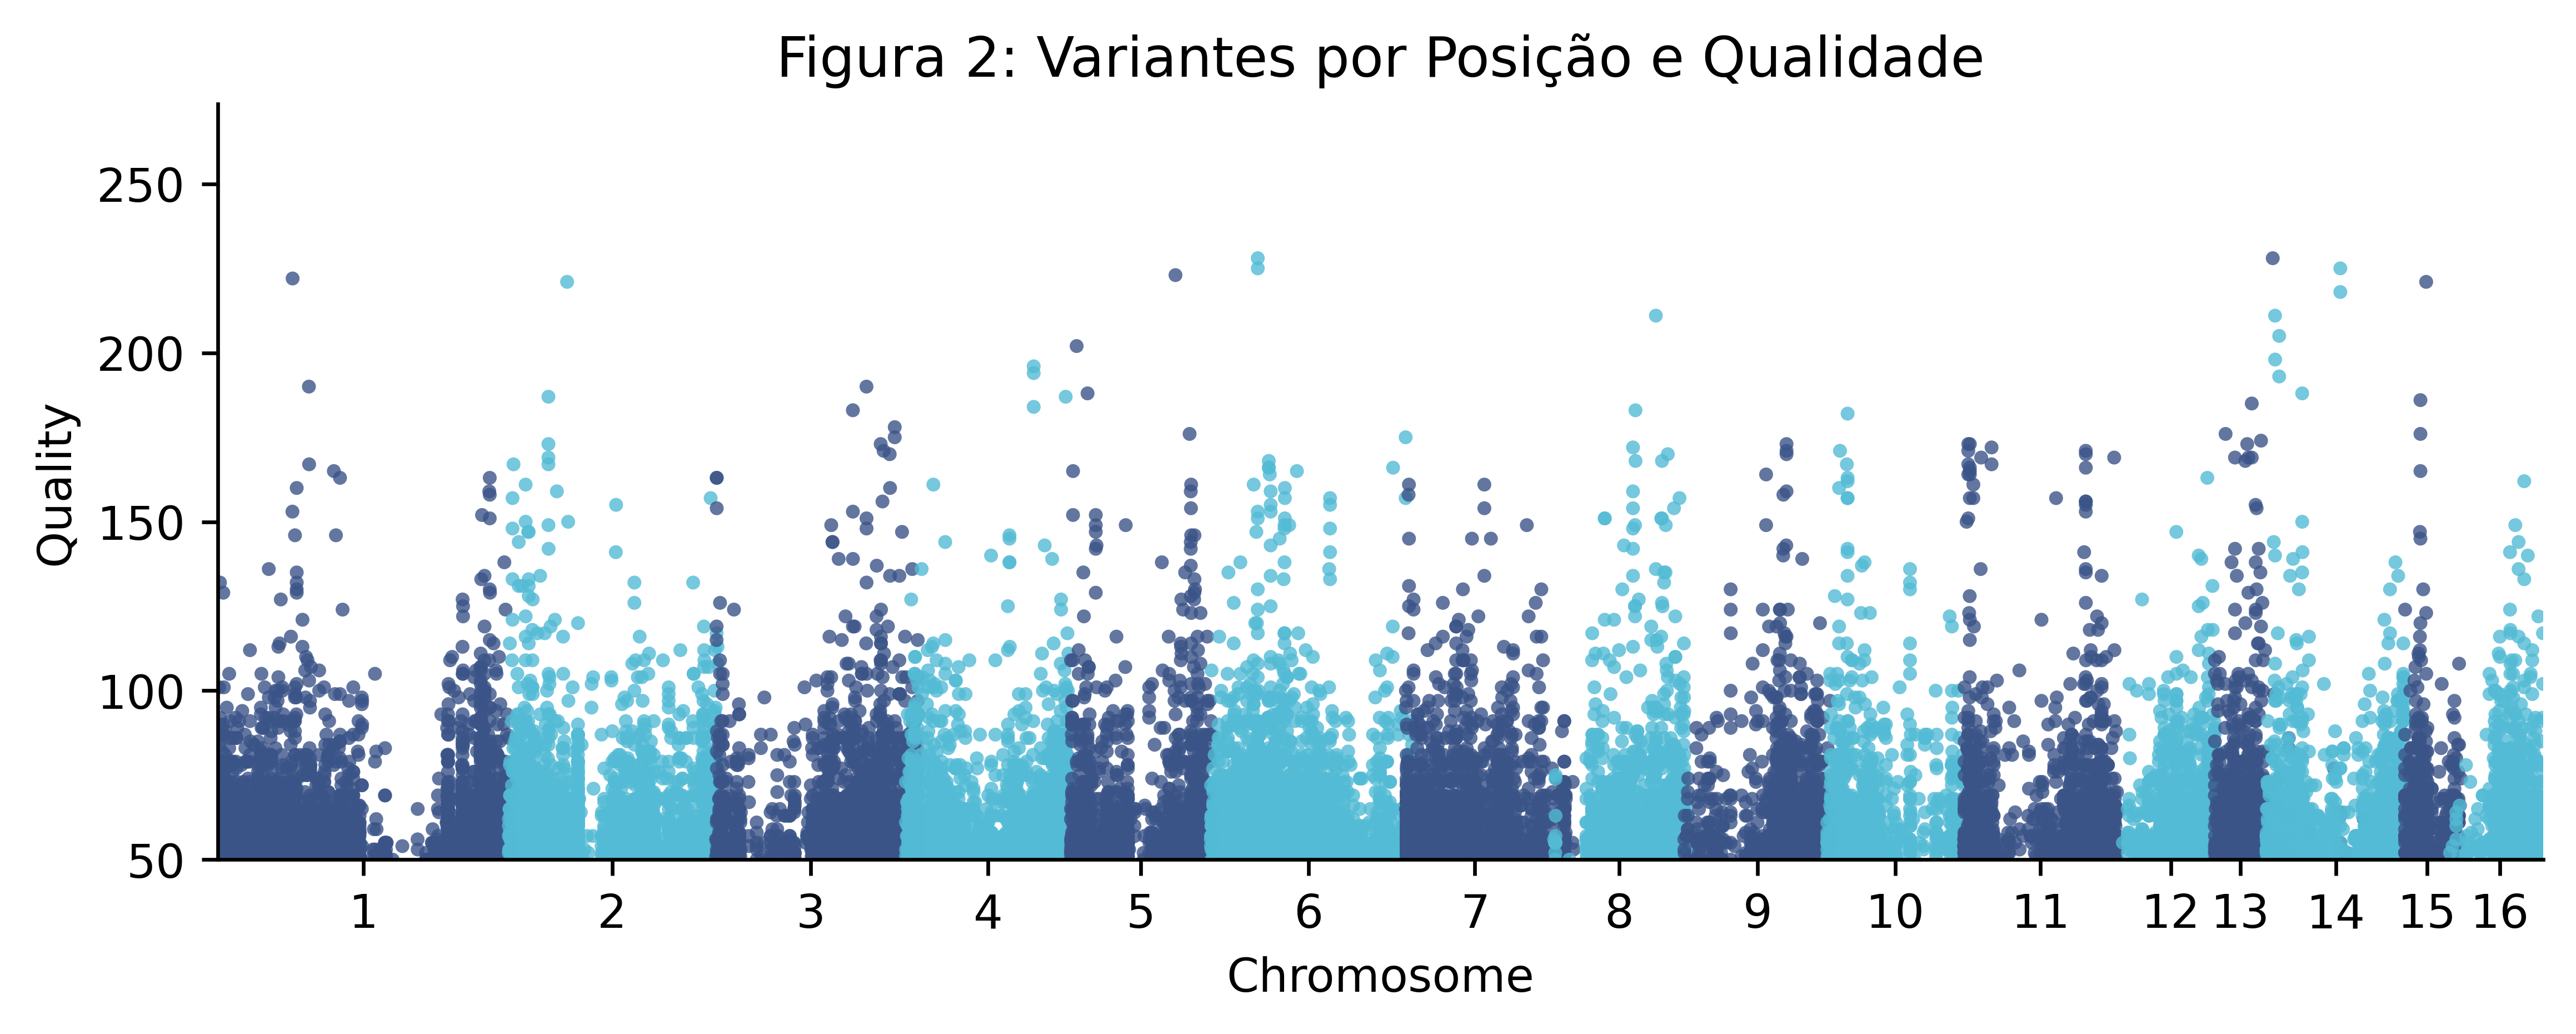

In [44]:
print(alldf.shape)
to_plot = alldf.loc[(alldf.Count>1) & (alldf.Count<12)].copy()
print(to_plot.shape)
ax = qmplot.manhattanplot(data=to_plot, pv="QUAL", logp=False, ylabel="Quality", title="Figura 2: Variantes por Posição e Qualidade")

In [23]:
# Número médio de SNPs observadas
np.mean([x.shape[0] for x in df])

12635.166666666666